# Ejemplo del algoritmo fuzzy C-means

En este ejemplo se realiza un análisis cluster con el algoritmo fuzzy C-means, se dibujan los grupos con diferentes colores y se muestra el grado de pertenencia de cada elemento al cluster asignado (es decir, aquel con el valor de pertenencia más alto). El algoritmo detecta diferentes niveles de pertenencia, variando desde valores alrededor de $0.5$ cerca de la frontera entre clusters hasta  valores superiores a $0.9$ cerca de los centroides. Se ha utilizado la implementación de C-means del paquete skfuzzy.


Para la obtención de los mismos resultados, se proporcionan los datos a utilizar para este ejemplo en un fichero CSV.

In [ ]:
# Realizamos la instalación del paquete skfuzzy de la librería scikit, el cual
# usaremos para ejecutar el algoritmo fuzzy C-means.
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=42b1e087e6311e0f6da137ca62a94d42ccfd05ac65e3e57addf289c82df85878
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

# Descargar el dataset que se utilizará utiliznado un enlace compartido de google drive
# Si la URL es https://drive.google.com/uc?id=IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
!gdown --id 1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15

# El fichero puede descargarse manualmente en https://drive.google.com/file/d/1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15

# Cargamos el fichero
datos_cluster = np.genfromtxt('datos_cluster.csv', delimiter=',')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eGYAeKky-SuwrGVc2-Pc4swwM8uwUy15
To: /content/datos_cluster.csv
100% 1.43k/1.43k [00:00<00:00, 1.55MB/s]


La implementación de C-means del paquete skfuzzy considera que los datos de entrada son una matriz de tamaño (S, N), donde S es el número de características de los datos y N es el número de observaciones. Notar sin embargo que los datos que hemos cargado son una matriz de tamaño (N, S). Más concretamente, mediante el comando
```
datos_cluster.shape
```
observamos que es de tamaño (40, 2). Por lo tanto, para utilizar esta implementación de C-means debemos proporcionar la matriz traspuesta, es decir, una de tamaño (2, 40). Esto se puede obtener usando
```
datos_cluster.T
```





In [ ]:
from skfuzzy.cluster import cmeans

K = 2 # Número de clusters
m = 2 # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5 # Tolerancia (criterio de parada)
maxiter = 100 # Número máximo de iteraciones

cntr, u, u0, d, jm, p, fpc = cmeans(datos_cluster.T, K, m, tolerancia, maxiter, seed=100)
# Parámetros de salida:
# - cntr: Centroides
# - u: Matriz de pertenencia de los indiviuos a los clusters
# - u0: Matriz u en la iteración 0
# - d: Matriz de distancias Euclideas en la última iteración
# - jm: Historico del valor de la función objetivo
# - p: Número de iteraciones
# - fpc: Coeficiente de partición difusa final

In [ ]:
# Como solo estamos interesados en los centroides y la matriz de pertenencia
# podemos descartar el resto de valores de salida:
centroides, U, _, _, _, _, _ = cmeans(datos_cluster.T, K, m, tolerancia, maxiter, seed=100)

In [ ]:
# Mostramos la matriz de pertenencia
with np.printoptions(threshold=False):
    print(U)

[[0.93101112 0.84426052 0.85399027 ... 0.14085388 0.08291719 0.01350332]
 [0.06898888 0.15573948 0.14600973 ... 0.85914612 0.91708281 0.98649668]]


In [ ]:
# Obtener a que grupo pertenece cada observación
grupos = np.argmax(U, axis=0) # Devuelve los índices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(U, axis=0) # Devuelve el valor máximo sobre el eje 0 (filas)

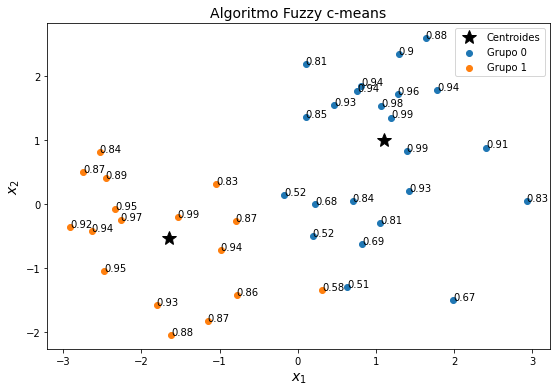

In [ ]:
## Representación gráfica de la solución
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# Representar las observaciones asociadas con cada grupo (cluster)
for k in range(0, K):
  plt.scatter(datos_cluster[grupos==k, 0], datos_cluster[grupos==k, 1], label="Grupo {}".format(k))

# Representar junto a cada observación el grado de pertenencia al grupo
for i, maxU_i in enumerate(np.round(maxU, 2)):
  plt.annotate(maxU_i, (datos_cluster[i,0], datos_cluster[i,1]))

plt.plot(centroides[:, 0], centroides[:, 1], 'k*', markersize=14, label="Centroides") # Dibujamos los centroides

plt.title("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()